<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA17_Cooper_%E7%9C%9F%E7%9A%84%E6%98%AF%E9%A6%AC%E7%88%BE%E6%BF%9F%E6%96%AF%E5%97%8E%EF%BC%9F%E4%BD%BF%E7%94%A8%E5%90%8D%E9%96%80_CNN_%E5%B9%AB%E5%8A%A9%E8%BE%A8%E8%AD%98%EF%BC%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### 1. 讀入資料集

In [3]:
!wget --no-check-certificate \
    https://github.com/yenlung/Python-AI-Book/raw/main/dataset/Cooper_img.zip \
    -O /content/Cooper.zip

--2022-07-12 09:58:25--  https://github.com/yenlung/Python-AI-Book/raw/main/dataset/Cooper_img.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yenlung/Python-AI-Book/main/dataset/Cooper_img.zip [following]
--2022-07-12 09:58:26--  https://raw.githubusercontent.com/yenlung/Python-AI-Book/main/dataset/Cooper_img.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1023448 (999K) [application/zip]
Saving to: ‘/content/Cooper.zip’

/content/Cooper.zip 100%[===================>] 999.46K  --.-KB/s    in 0.02s   

2022-07-12 09:58:26 (60.4 MB/s) - ‘/content/Cooper.zip’ saved [1023448/1023448]



In [4]:
import os
import zipfile

local_zip = '/content/Cooper.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
os.listdir('/content/Cooper')

['cooper03.jpg',
 'cooper01.jpg',
 'cooper05.jpg',
 'cooper04.jpg',
 'cooper06.jpg',
 'cooper02.jpg']

In [6]:
base_dir = '/content/'
cooper_dir = 'Cooper/'
thedir = base_dir + cooper_dir

cooper = os.listdir(thedir)

### 2. 讀入一隻 Cooper 試試

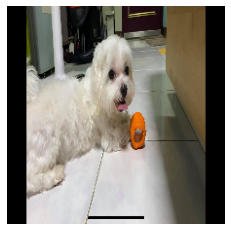

In [7]:
img = load_img(thedir + cooper[2], target_size = (224, 224))
img_arr = np.array(img)
plt.axis('off')
plt.imshow(img_arr);

In [8]:
x = img_arr.reshape(1, 224, 224, 3)

In [9]:
inp = preprocess_input(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


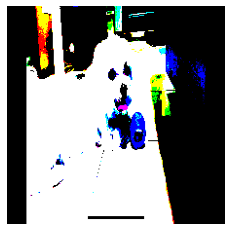

In [10]:
plt.axis('off')
plt.imshow(inp.reshape(224,224,3));

### 3. 讀入 ResNet50 及 labels

In [11]:
with open('imagenet-classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [12]:
labels[:10]

['tench 鯉魚類淡水魚',
 'goldfish 金魚',
 'great white shark 大白鯊',
 'tiger shark 虎鯊',
 'hammerhead 鎚頭鯊',
 'electric ray 電魟',
 'stingray 魟魚',
 'cock 公雞',
 'hen 母雞',
 'ostrich 鴕鳥']

In [13]:
resnet = ResNet50()

102981632/102967424 [==============================] - 1s 0us/step


In [14]:
y_pred = np.argmax(resnet.predict(inp), axis=-1)[0]

In [15]:
print(f"ResNet 覺得是 {labels[y_pred]}")

ResNet 覺得是 Maltese dog 馬爾濟斯犬


### 4. 做成 Web App!

In [16]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 14.9 MB/s 
     |████████████████████████████████| 2.3 MB 25.1 MB/s 
     |████████████████████████████████| 57 kB 6.3 MB/s 
     |████████████████████████████████| 84 kB 4.4 MB/s 
     |████████████████████████████████| 1.1 MB 54.5 MB/s 
     |████████████████████████████████| 54 kB 4.0 MB/s 
     |████████████████████████████████| 140 kB 77.3 MB/s 
     |████████████████████████████████| 84 kB 4.9 MB/s 
     |████████████████████████████████| 212 kB 64.2 MB/s 
     |████████████████████████████████| 272 kB 77.1 MB/s 
     |████████████████████████████████| 144 kB 75.0 MB/s 
     |████████████████████████████████| 271 kB 76.3 MB/s 
     |████████████████████████████████| 94 kB 4.5 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 11.4 MB/s 
     |████████████████████████████████| 68 k

In [17]:
import gradio as gr

In [18]:
thedir

'/content/Cooper/'

In [19]:
cooper

['cooper03.jpg',
 'cooper01.jpg',
 'cooper05.jpg',
 'cooper04.jpg',
 'cooper06.jpg',
 'cooper02.jpg']

In [20]:
sample_images = [os.path.join(thedir, file) for file in cooper]

In [21]:
def classify_image(inp):
    inp = inp.reshape((-1, 224, 224, 3))
    inp = preprocess_input(inp)
    prediction = resnet.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.Image(shape=(224, 224), label="請上傳一張圖片")
label = gr.Label(num_top_classes=3, label="模型猜測的答案是：")

gr.Interface(fn=classify_image, 
             inputs=image, 
             outputs=label, 
             examples=sample_images).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://39416.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7ff39b33fe50>,
 'http://127.0.0.1:7860/',
 'https://39416.gradio.app')